In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69839_G')

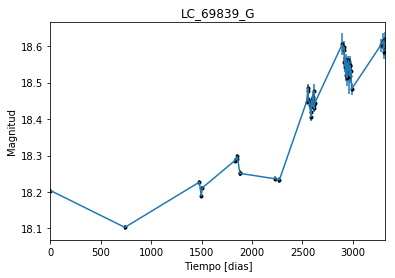

In [3]:
data = np.genfromtxt('LC_69839_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69839_G')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

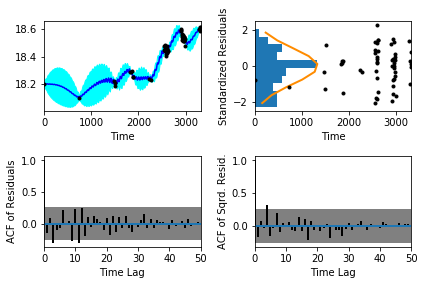

In [6]:
sample.assess_fit()

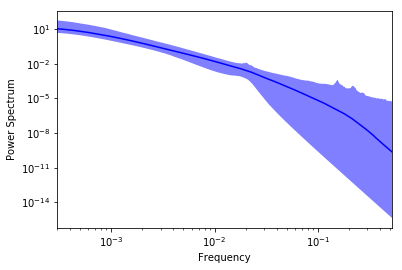

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69839_G')

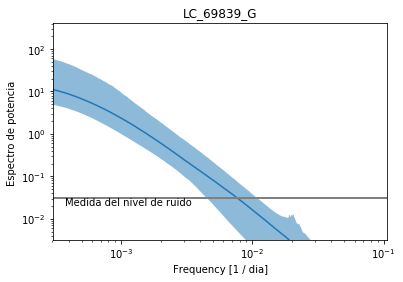

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69839_G')

Text(0.5,1,'Prediccion , valor esperado LC_69839_G')

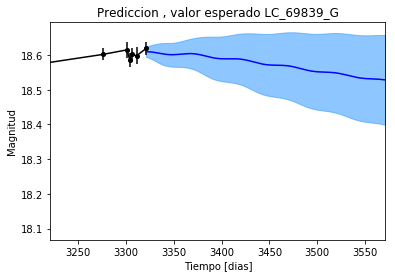

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69839_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_69839_G')

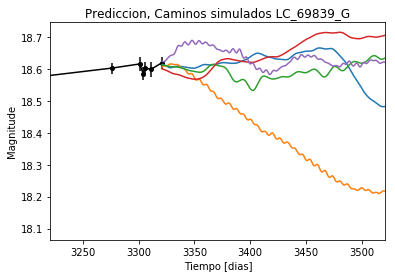

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69839_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69839_G')

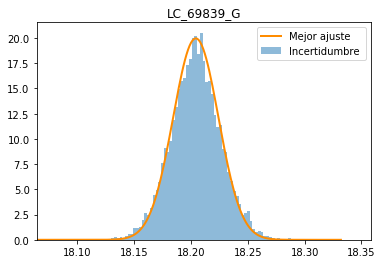

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69839_G')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_G')

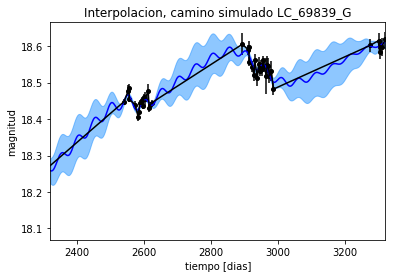

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_G')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_G')

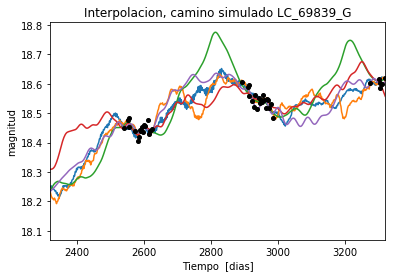

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_G')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 338.949052128
Median: 0.0143525171831
Standard deviation: 0.196418261253
68% credibility interval: [ 0.00112301  0.17526877]
95% credibility interval: [  3.98502704e-04   8.03082311e-01]
99% credibility interval: [  3.20758047e-04   9.71487147e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 161.399561756
Median: 0.00504696160653
Standard deviation: 0.0725240723351
68% credibility interval: [ 0.00048409  0.04289003]
95% credibility interval: [ 0.00031424  0.21320032]
99% credibility interval: [  3.03538489e-04   4.88519520e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 283.534800944
Median: 0.0221770018464
Standard 

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 597.565895717
Median: 140.883506561
Standard deviation: 1.96940087924
68% credibility interval: [ 138.79000018  142.35154559]
95% credibility interval: [ 135.84728233  143.66377065]
99% credibility interval: [ 133.48764971  144.51818656]


In [21]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 267.539155539
Median: 0.434024824575
Standard deviation: 2.22411099943
68% credibility interval: [ 0.07839391  3.46708439]
95% credibility interval: [ 0.0163908   7.73831097]
99% credibility interval: [  0.01062914  10.27946039]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 495.730413444
Median: 1.36424798622
Standard deviation: 8.88472859103
68% credibility interval: [  0.0477136   10.80862505]
95% credibility interval: [  1.39980487

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0373162
Median: 5.10703197711e-16
Standard deviation: 2.52068856614e+58
68% credibility interval: [  5.85040709e-53   2.67803304e-03]
95% credibility interval: [  1.07265970e-106   9.08057333e+001]
99% credibility interval: [  2.86662459e-113   1.72497152e+054]


In [23]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 943.679037688
Median: 18.3173969626
Standard deviation: 0.0797965969083
68% credibility interval: [ 18.24564767  18.38839529]
95% credibility interval: [ 18.16401164  18.48228218]
99% credibility interval: [ 18.09415838  18.56226516]


In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 204.615878951
Median: 0.068579568835
Standard deviation: 0.246123971971
68% credibility interval: [ 0.          0.42067404]
95% credibility interval: [ 0.          0.87829353]
99% credibility interval: [ 0.          1.02386515]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 204.615878951
Median: 0.068579568835
Standard deviation: 0.246123971971
68% credibility interval: [ 0.          0.42067404]
95% credibility interval: [ 0.          0.87829353]
99% credibility interval: [ 0.          1.02386515]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 425.757755989
Median: 0.0
Standard deviation: 0.000158660289362
68% cred

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 597.565895717
Median: 140.883506561
Standard deviation: 1.96940087924
68% credibility interval: [ 138.79000018  142.35154559]
95% credibility interval: [ 135.84728233  143.66377065]
99% credibility interval: [ 133.48764971  144.51818656]


In [26]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 447.10023225
Median: 0.0216993687506
Standard deviation: 0.0268495303765
68% credibility interval: [ 0.01412834  0.03785644]
95% credibility interval: [ 0.01025045  0.09240077]
99% credibility interval: [ 0.0083614   0.17752216]


In [28]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 681.504182629
Median: 1.08373695567
Standard deviation: 0.193991298049
68% credibility interval: [ 0.90557575  1.27867886]
95% credibility interval: [ 0.76274425  1.53521586]
99% credibility interval: [ 0.68134016  1.72808819]


In [29]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 268.737929816
Median: 0.00128909969689
Standard deviation: 0.0729209349878
68% credibility interval: [  1.81599596e-05   1.61333073e-02]
95% credibility interval: [  2.03113342e-06   1.41005141e-01]
99% credibility interval: [  2.12287145e-58   5.57745244e-01]


In [30]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 338.949052128
Median: (-0.0901795250859-1.31193028377j)
Standard deviation: 1.97852649645
68% credibility interval: [-1.10124615-2.92223232j -0.00705609-4.14830224j]
95% credibility interval: [ -5.04591498e+00+0.j          -2.50386633e-03-0.94588639j]
99% credibility interval: [ -6.10403377e+00+0.j          -2.01538225e-03-2.85137185j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 161.399561756
Median: (-0.031710995012+0.839607017189j)
Standard deviation: 1.61218197972
68% credibility interval: [-0.26948603+0.94889986j -0.00304162+0.01674056j]
95% credibility interval: [-1.33957714+2.40041416j -0.00197444+0.j        ]
99% credibility interval: [ -3.06945867e+00+0.64541437j  -1.90718857e-03+0.j        ]
Posterior summ